In [1]:
# example of a cnn for image classification
import numpy as np
from numpy import asarray
from numpy import unique
from numpy import argmax
import pandas as pd
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
import tensorflow as tf
import seaborn as sns

2023-03-28 14:07:04.885123: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


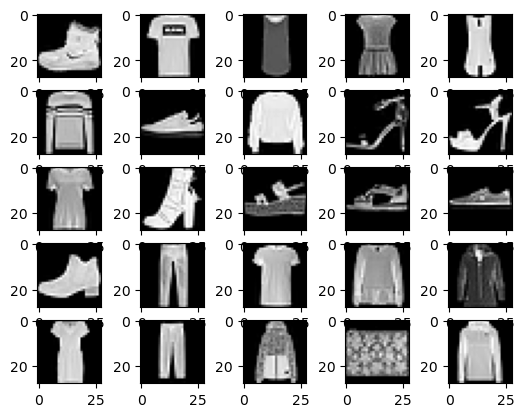

In [2]:
from matplotlib import pyplot
# load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
# plot first few images
for i in range(25):
 # define subplot
 pyplot.subplot(5, 5, i+1)
 # plot raw pixel data
 pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [30]:
# list the label names manually inputted
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# reshape data to have a single channel
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
# determine the shape of the input images
in_shape = X_train.shape[1:]

In [5]:
# determine the number of classes
n_classes = len(unique(y_train))
print(in_shape, n_classes)

(28, 28, 1) 10


In [6]:
# normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [7]:
# define model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

2023-03-28 14:07:09.571595: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=0)

In [9]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)
# make a prediction
for i in range(10):
    image = X_train[i]
    yhat = model.predict(asarray([image]))
    print(f'Predicted: class={argmax(yhat)}')

Accuracy: 0.906
1/1 [==============================] - 0s 58ms/step
Predicted: class=9
1/1 [==============================] - 0s 18ms/step
Predicted: class=0
1/1 [==============================] - 0s 18ms/step
Predicted: class=0
1/1 [==============================] - 0s 18ms/step
Predicted: class=3
1/1 [==============================] - 0s 17ms/step
Predicted: class=1
1/1 [==============================] - 0s 18ms/step
Predicted: class=2
1/1 [==============================] - 0s 18ms/step
Predicted: class=7
1/1 [==============================] - 0s 18ms/step
Predicted: class=2
1/1 [==============================] - 0s 17ms/step
Predicted: class=5
1/1 [==============================] - 0s 19ms/step
Predicted: class=5


In [10]:
for i in range(10):
    image = X_train[i]
    label = y_train[i]
    yhat = model.predict(asarray([image]))
    print(f'Predicted: class={argmax(yhat)}, the actual label was: {label}' )

1/1 [==============================] - 0s 17ms/step
Predicted: class=9, the actual label was: 9
1/1 [==============================] - 0s 17ms/step
Predicted: class=0, the actual label was: 0
1/1 [==============================] - 0s 18ms/step
Predicted: class=0, the actual label was: 0
1/1 [==============================] - 0s 17ms/step
Predicted: class=3, the actual label was: 3
1/1 [==============================] - 0s 17ms/step
Predicted: class=1, the actual label was: 0
1/1 [==============================] - 0s 18ms/step
Predicted: class=2, the actual label was: 2
1/1 [==============================] - 0s 17ms/step
Predicted: class=7, the actual label was: 7
1/1 [==============================] - 0s 16ms/step
Predicted: class=2, the actual label was: 2
1/1 [==============================] - 0s 17ms/step
Predicted: class=5, the actual label was: 5
1/1 [==============================] - 0s 16ms/step
Predicted: class=5, the actual label was: 5


In [11]:
image.shape

(28, 28, 1)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                        

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [
             EarlyStopping(patience=2)
]

In [14]:
history = model.fit(X_train,y_train, epochs=600, validation_data=(X_test,y_test), callbacks=callbacks)

Epoch 1/600
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3118 - accuracy: 0.8841 - val_loss: 0.2778 - val_accuracy: 0.8975
Epoch 2/600
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2802 - accuracy: 0.8952 - val_loss: 0.2724 - val_accuracy: 0.9020
Epoch 3/600
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2627 - accuracy: 0.9019 - val_loss: 0.2648 - val_accuracy: 0.9030
Epoch 4/600
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2515 - accuracy: 0.9060 - val_loss: 0.2564 - val_accuracy: 0.9077
Epoch 5/600
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2419 - accuracy: 0.9083 - val_loss: 0.2635 - val_accuracy: 0.9098
Epoch 6/600
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2305 - accuracy: 0.9130 - val_loss: 0.2644 - val_accuracy: 0.9081


In [15]:
metrics_df = pd.DataFrame(history.history)

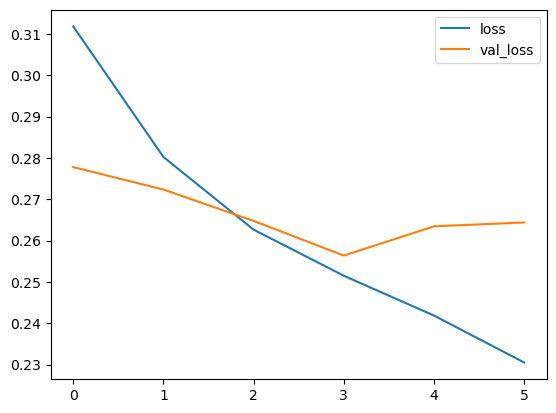

In [16]:
metrics_df[["loss","val_loss"]].plot();

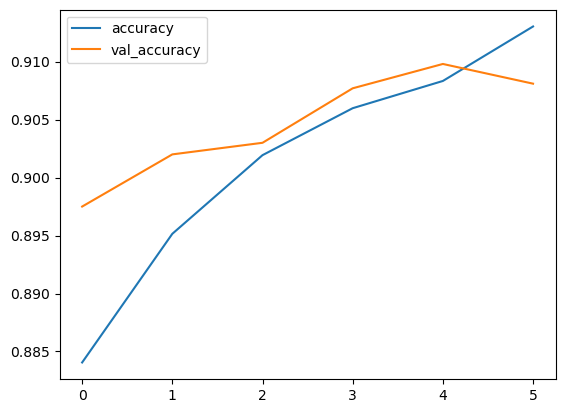

In [17]:
metrics_df[["accuracy","val_accuracy"]].plot();

In [25]:
image = []
label = []
yhat = []

for i in range(len(X_test)):
    image.append(X_test[i])
    label.append(y_test[i])
    yhat.append(argmax(model.predict(asarray([image[i]]))))

1/1 [==============================] - 0s 18ms/step


In [26]:
cm = confusion_matrix(label, yhat)

<Axes: >

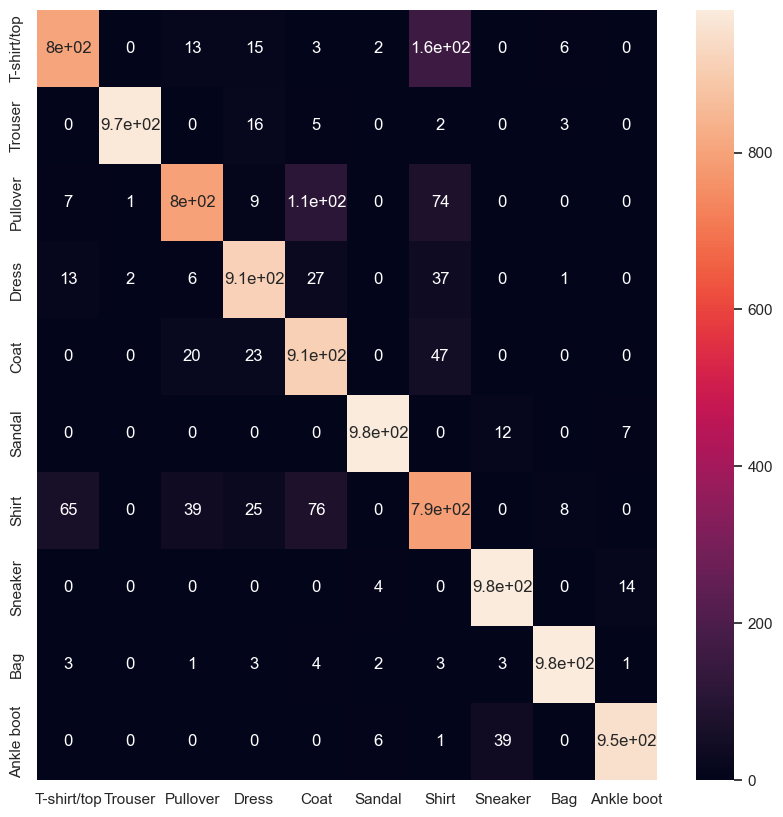

In [33]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(cm, annot=True, xticklabels=label_names, yticklabels=label_names)